In [1]:
#Problem 4 Decision Tree Model

In [ ]:
# (a) Process the data to make it available for a tree classfier. Load the dat from Debt evading table from probelem 2 and classify the data

In [ ]:
import pandas as p
from sklearn.model_selection import train_test_split

In [2]:
columns = ['Martial','Estate','Income','Evade']
features = ['Martial','Estate','Income']
dataset = p.read_excel("Debt Evading.xlsx", header=0, names=columns)

In [3]:
# covert the categorical data like Single, Married Divorced and Estate Yes or No into interger classes 0,1,2 0/1
from sklearn.preprocessing import LabelEncoder
for columns in dataset.columns:
    if dataset[columns].dtype == type(object):
        l = LabelEncoder()
        dataset[columns] = l.fit_transform(dataset[columns])

In [11]:
#data set after encoded
dataset

,Martial,Estate,Income,Evade
0,2,1,125,0
1,1,0,100,0
2,2,0,70,0
3,1,1,120,0
4,0,0,95,1
5,1,0,60,0
6,0,1,220,0
7,2,0,85,1
8,1,0,75,0
9,2,0,90,1


In [4]:
#X = inouts , attributes of Debt Evading table : Martial,Income,Estate
#Y = Evade (Yes,No)
input_X = dataset.iloc[0:11,[0,1,2]]
output_Y = dataset.iloc[0:11,-1]
X_train, X_test, Y_train, Y_test = train_test_split(input_X, output_Y, test_size=0.2, random_state=0)

In [ ]:
# (b) Train a D-tree and generate a figure of the D-tree with graphviz.

In [5]:
# Use DecisionTreeClassifier module from sklearn.tree.DecisionTreeClassifier based on information gain and entropy
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy')
classifier = classifier.fit(X_train,Y_train)
Y_predict = classifier.predict(X_test)

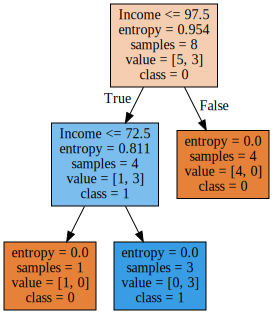

In [13]:
from sklearn.tree import export_graphviz
from sklearn import tree

from IPython.display import SVG
from graphviz import Source
from IPython.display import display
graph = Source(tree.export_graphviz(classifier, out_file=None
   , feature_names=features, class_names=['0', '1', '2'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [14]:
#(C) Analyze and comment on the D-tree.


# The D- tree is drawn on basis of classification attributes Martial, Income, Estate with respect to Entropy of the each attribute.
#The tree has Income has head node depicts that it has highgain ratio compared to Estate and Maritial
# It uses a scaling of <=95K and <=72.5K as filters for divinding the income attribute value and classify them accordingly.
# Each node in the above D- tree shows the information of no.of inout samples, values, entropy and class label of the attributes.

In [ ]:
# References for the above work :
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#Problem2 data set 
#https://ipython.org/ipython-doc/3/api/generated/IPython.display.html for visualization